# LINEAR MODEL
## Lasso model selection: AIC-BIC / cross-validation - [source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py)

In [1]:
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

### Generate some sparse data to play with

In [2]:
np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

### Decreasing coef w. alternated signs for visualization

In [3]:
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0 # sparsify coef
y = np.dot(X, coef)

### Add Noise

In [4]:
y += 0.01 * np.random.normal(size = n_samples)

### Split data in train set and test set

In [5]:
n_sample = X.shape[0]
X_train, y_train = X[: n_samples // 2], y[: n_samples // 2]
X_test, y_test = X[n_samples // 2 :], y[n_samples // 2 :]

## Lasso

In [6]:
from sklearn.linear_model import Lasso

In [7]:
lasso = Lasso(alpha=0.1)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1)
r^2 on test data : 0.658064


## ElasticNet

In [8]:
from sklearn.linear_model import ElasticNet

In [9]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)

print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.642515


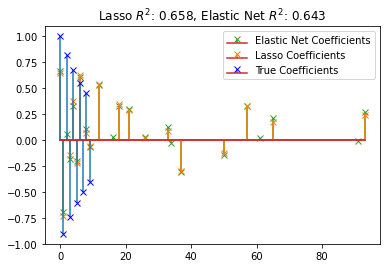

In [10]:
m, s, _ = plt.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic Net Coefficients",
    use_line_collection=True
)

plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(
    np.where(lasso.coef_)[0],
    lasso.coef_[lasso.coef_ != 0],
    markerfmt="x",
    label="Lasso Coefficients",
    use_line_collection=True
)

plt.setp([m, s], color="#ff7f0e")
plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="True Coefficients",
    markerfmt="bx",
    use_line_collection=True,
)

plt.legend(loc="best")
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (r2_score_lasso, r2_score_enet))
plt.show()